Credit Card Fraud Detection

Import Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn 
import random 

np.random.seed(2)

Importing Datasets

In [68]:
dataset = pd.read_csv('creditcard.csv')

Data Visualisation

In [69]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
dataset.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [71]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Pre-processing tools

In [72]:
from sklearn.preprocessing import StandardScaler
dataset['normalizedAmount']  = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'],axis = 1)

In [73]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [74]:
dataset  = dataset.drop(['Time'],axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [75]:
X = dataset.iloc[ :,dataset.columns != 'Class']
y = dataset.iloc[:, dataset.columns == 'Class']

In [76]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [77]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y ,test_size= 0.3 , random_state=0)

In [79]:
X_train.shape

(199364, 29)

In [80]:
X_test.shape

(85443, 29)

In [81]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Deep Neural Network

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [83]:
model = Sequential([Dense(units=16, input_dim = 29,activation='relu') , Dense(units=24,activation='relu') , Dropout(0.5) , Dense(20,activation='relu') , Dense(24,activation='relu') , Dense(1,activation='sigmoid'),])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                480       
                                                                 
 dense_16 (Dense)            (None, 24)                408       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_17 (Dense)            (None, 20)                500       
                                                                 
 dense_18 (Dense)            (None, 24)                504       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

Training model

In [85]:
model.compile(optimizer='adam',loss = 'binary_crossentropy' , metrics=['accuracy'] )
model.fit(X_train, y_train, batch_size = 15, epochs =5)

Epoch 1/5
13291/13291 [==============================] - 22s 2ms/step - loss: 0.0080 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0035 - accuracy: 0.9994


In [86]:
score = model.evaluate(X_test , y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0036 - accuracy: 0.9994


In [87]:
print(score)

[0.003553794464096427, 0.999426543712616]


In [88]:
import itertools
from sklearn import svm ,datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes ,normalize = False , title = 'Confusion_metrix',cmap  = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusin matrix")
    else:
        print ("Confussion matrix, without normalized")

    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap )
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation = 45)
    plt.yticks(tick_marks , classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.ylabel("True label")
    plt.xlabel("Prediction label")
    plt.tight_layout()



In [89]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

2671/2671 [==============================] - 3s 1ms/step


In [90]:
cnf_matrix = confusion_matrix(y_test,y_pred.round())
print(cnf_matrix)

[[85275    21]
 [   28   119]]


Confussion matrix, without normalized
[[85275    21]
 [   28   119]]


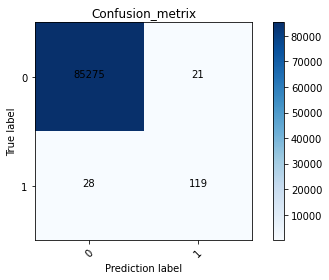

In [91]:
plot_confusion_matrix(cnf_matrix ,classes=[0,1])

In [92]:
y_pred  = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected , y_pred.round()) 

8901/8901 [==============================] - 12s 1ms/step


Confussion matrix, without normalized
[[284245     70]
 [    89    403]]


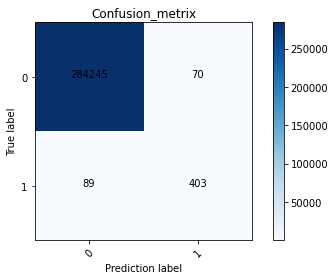

In [93]:
plot_confusion_matrix(cnf_matrix ,classes = [0,1])